# Get graph data

This notebook allows you to download a graph on which you agents can travel.

After running the notebook, a new `edges.geojson` is created in the directory GeoVectorBlueprint/Resources. You can use this file as an input file for one of the layers of your model. To do this, specify the path to the input file in the simulation configuration file `config.json`.

In [17]:
!pip install osmnx

In [18]:
import os
import datetime as dt
from pathlib import Path

import matplotlib.pyplot as plt
import osmnx as ox
import shapely

In [19]:
# USER: specify parameters here
# Read the shape that is defined in the given WKT file so that it can be used by OSMnx.
# This WKT file can be created with https://geojson.io/ (see Step 1 in README.md of this project).
# Make sure that the filename of your WKT file matches the value assigned to the variable WKT_FILE below.
WKT_FILE = 'Port_Elizabeth.wkt'
NETWORK_TYPE = 'drive'  # For more information on available network types, see OSMnx documentation (https://osmnx.readthedocs.io/en/stable/osmnx.html).

with open(WKT_FILE) as f:
    wkt = f.read()
    
shape = shapely.wkt.loads(wkt)

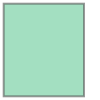

In [20]:
shape

In [21]:
# Download graph from shape object.
# NOTE: depending on size of area of interest (AOI) of and the requested network type, this might take some time.
G = ox.graph_from_polygon(
    shape,
    network_type=NETWORK_TYPE,
    simplify=True
)

In [22]:
# Save graph nodes and edges to disk as GeoJSON.
# No direct API in OSMNx, but the maintainer has provided the following snippet: https://github.com/gboeing/osmnx/issues/622.
gdf_nodes, gdf_edges = ox.graph_to_gdfs(G)
gdf_nodes = ox.io._stringify_nonnumeric_cols(gdf_nodes)
gdf_edges = ox.io._stringify_nonnumeric_cols(gdf_edges)

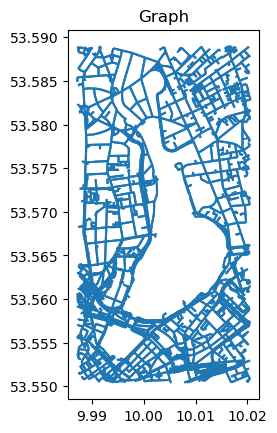

In [23]:
# Visualize the graph
gdf_edges.plot()
plt.title("Graph")
plt.show()

In [24]:
# Save the downloaded graph as a GEOJSON file for later use in your MARS model.
res = Path("./GeoVectorBlueprint/Resources")
res.mkdir(parents=True, exist_ok=True)

# If the file already exists make a backup
if (res / f'edges_{NETWORK_TYPE}.geojson').is_file():
    now = dt.datetime.now()
    os.rename(res / f'edges_{NETWORK_TYPE}.geojson', res / f'bkp_edges_{NETWORK_TYPE}_{now.strftime("%Y%m%d_%H%M%S")}.geojson')

gdf_edges.to_file(res / f'edges_{NETWORK_TYPE}.geojson', driver='GeoJSON')

# Nodes are not need for simulation
# gdf_nodes.to_file('nodes.geojson', driver='GeoJSON') 